In [68]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


# Feature Engineering

- Package Import and Data Loading
- Feature engineering
- Variable correlation
- Removing outliers
- Pickling

### Import packages

In [69]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import os

### Data Directory

In [70]:
PICKLE_TRAIN_DIR = os.path.join("F:\Python Practice", "processing_data", "df_train.pkl")
PICKLE_HISTORY_DIR = os.path.join("F:\Python Practice", "processing_data", "df_training_data_history.pkl")

### Load data into dataframes

In [71]:
history_data = pd.read_pickle(PICKLE_HISTORY_DIR)
train = pd.read_pickle(PICKLE_TRAIN_DIR)

Since we have the consumption data for each of the companies for the year 2015, we will create new features using the average of the year, the
last six months, and the last three months to our model

In [72]:
# Average of Year
mean_year = history_data.groupby(["Id"]).mean().reset_index()
mean_year.head()

,Id,Price of Energy for the 1st Period,Price of Energy for the 2nd Period,Price of Energy for the 3rd Period,Price of Power for the 1st Period,Price of Power for the 2nd Period,Price of Power for the 3rd Period
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
2,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
3,001cd16732dc7d5bdf46b0d49996c271,0.172369,0.000000,0.000000,45.189154,0.000000,0.000000
4,001dc71143f45cb58aaccc2e94823c5a,0.147308,0.000000,0.000000,44.355820,0.000000,0.000000


In [73]:
# Average of 6 Months
mean_6m = history_data[history_data["Reference Date"] > "2015-06-01"].groupby(["Id"]).mean().reset_index()
mean_6m.head()

,Id,Price of Energy for the 1st Period,Price of Energy for the 2nd Period,Price of Energy for the 3rd Period,Price of Power for the 1st Period,Price of Power for the 2nd Period,Price of Power for the 3rd Period
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555
2,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000
3,001cd16732dc7d5bdf46b0d49996c271,0.192293,0.000000,0.000000,46.111377,0.00000,0.000000
4,001dc71143f45cb58aaccc2e94823c5a,0.145791,0.000000,0.000000,44.444710,0.00000,0.000000


In [74]:
# Average of 3 Months
mean_3m = history_data[history_data["Reference Date"] > "2015-10-01"].groupby(["Id"]).mean().reset_index()
mean_3m.head()

,Id,Price of Energy for the 1st Period,Price of Energy for the 2nd Period,Price of Energy for the 3rd Period,Price of Power for the 1st Period,Price of Power for the 2nd Period,Price of Power for the 3rd Period
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555
2,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000
3,001cd16732dc7d5bdf46b0d49996c271,0.200142,0.000000,0.000000,46.444710,0.00000,0.000000
4,001dc71143f45cb58aaccc2e94823c5a,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000


### Combine them in a single dataframe

In [75]:
mean_year = mean_year.rename(index = str, columns = {"Price of Energy for the 1st Period": "Mean Year Price for 1st Period",
                                                     "Price of Energy for the 2nd Period": "Mean Year Price for 2nd Period",
                                                     "Price of Energy for the 3rd Period": "Mean Year Price for 3rd Period",
                                                     "Price of Power for the 1st Period": "Mean Power Price for 1st Period",
                                                     "Price of Power for the 2nd Period": "Mean Power Price for 2nd Period",
                                                     "Price of Power for the 3rd Period": "Mean Power Price for 3rd Period",})

mean_year["Mean Year Price p1"] = mean_year["Mean Year Price for 1st Period"] + mean_year["Mean Power Price for 1st Period"]
mean_year["Mean Year Price p2"] = mean_year["Mean Year Price for 2nd Period"] + mean_year["Mean Power Price for 2nd Period"]
mean_year["Mean Year Price p3"] = mean_year["Mean Year Price for 3rd Period"] + mean_year["Mean Power Price for 3rd Period"]

In [76]:
mean_year.head()

,Id,Mean Year Price for 1st Period,Mean Year Price for 2nd Period,Mean Year Price for 3rd Period,Mean Power Price for 1st Period,Mean Power Price for 2nd Period,Mean Power Price for 3rd Period,Mean Year Price p1,Mean Year Price p2,Mean Year Price p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
2,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
3,001cd16732dc7d5bdf46b0d49996c271,0.172369,0.000000,0.000000,45.189154,0.000000,0.000000,45.361523,0.000000,0.000000
4,001dc71143f45cb58aaccc2e94823c5a,0.147308,0.000000,0.000000,44.355820,0.000000,0.000000,44.503128,0.000000,0.000000


In [77]:
mean_6m = mean_6m.rename(index=str, columns={"Price of Energy for the 1st Period": "Mean 6m Price for 1st Period",
                                             "Price of Energy for the 2nd Period": "Mean 6m Price for 2nd Period",
                                             "Price of Energy for the 3rd Period": "Mean 6m Price for 3rd Period",
                                             "Price of Power for the 1st Period": "Mean Power Price for 1st Period",
                                             "Price of Power for the 2nd Period": "Mean Power Price for 2nd Period",
                                             "Price of Power for the 3rd Period": "Mean Power Price for 3rd Period",})
mean_6m["Mean 6m Price p1"] = mean_6m["Mean 6m Price for 1st Period"] + mean_6m["Mean Power Price for 1st Period"]
mean_6m["Mean 6m Price p2"] = mean_6m["Mean 6m Price for 2nd Period"] + mean_6m["Mean Power Price for 2nd Period"]
mean_6m["Mean 6m Price p3"] = mean_6m["Mean 6m Price for 3rd Period"] + mean_6m["Mean Power Price for 3rd Period"]

In [78]:
mean_6m.head()

,Id,Mean 6m Price for 1st Period,Mean 6m Price for 2nd Period,Mean 6m Price for 3rd Period,Mean Power Price for 1st Period,Mean Power Price for 2nd Period,Mean Power Price for 3rd Period,Mean 6m Price p1,Mean 6m Price p2,Mean 6m Price p3
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283
1,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555,40.843313,24.533410,16.360973
2,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000
3,001cd16732dc7d5bdf46b0d49996c271,0.192293,0.000000,0.000000,46.111377,0.00000,0.000000,46.303670,0.000000,0.000000
4,001dc71143f45cb58aaccc2e94823c5a,0.145791,0.000000,0.000000,44.444710,0.00000,0.000000,44.590501,0.000000,0.000000


In [79]:
mean_3m = mean_3m.rename(index=str, columns={"Price of Energy for the 1st Period": "Mean 3m Price for 1st Period",
                                             "Price of Energy for the 2nd Period": "Mean 3m Price for 2nd Period",
                                             "Price of Energy for the 3rd Period": "Mean 3m Price for 3rd Period",
                                             "Price of Power for the 1st Period": "Mean Power Price for 1st Period",
                                             "Price of Power for the 2nd Period": "Mean Power Price for 2nd Period",
                                             "Price of Power for the 3rd Period": "Mean Power Price for 3rd Period",})
mean_3m["mean 3m price p1"] = mean_3m["Mean 3m Price for 1st Period"] + mean_3m["Mean Power Price for 1st Period"]
mean_3m["mean 3m price p2"] = mean_3m["Mean 3m Price for 2nd Period"] + mean_3m["Mean Power Price for 2nd Period"]
mean_3m["mean 3m price p3"] = mean_3m["Mean 3m Price for 3rd Period"] + mean_3m["Mean Power Price for 3rd Period"]

In [80]:
mean_3m.head()

,Id,Mean 3m Price for 1st Period,Mean 3m Price for 2nd Period,Mean 3m Price for 3rd Period,Mean Power Price for 1st Period,Mean Power Price for 2nd Period,Mean Power Price for 3rd Period,mean 3m price p1,mean 3m price p2,mean 3m price p3
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
2,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000
3,001cd16732dc7d5bdf46b0d49996c271,0.200142,0.000000,0.000000,46.444710,0.00000,0.000000,46.644852,0.000000,0.000000
4,001dc71143f45cb58aaccc2e94823c5a,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000,44.589757,0.000000,0.000000


In [81]:
features = mean_year

**Feature Engineering**

Transforming Boolean Data

For the column has_gas, we will replace t for True or 1 and f for False or 0 . This process is usually referred as onehot encoding

In [82]:
train["Client has Gas"] = train["Client has Gas"].replace(["t", "f"],[1,0])

**Categorical data and dummy variables**

When training our model we cannot use string data as such, so we will need to encode it into numerical data. The easiest method is mapping each category to an integer ( label encoding ) but this will not work because the model will misunderstand the data to be in some kind of order or hierarchy, 0 < 1 < 2 < 3 ...

For that reason we will use a method with dummy variables or onehot encoder

**Categorical data channel_sales**

What we are doing here relatively simple, we want to convert each category into a new dummy variable which will have 0 s and 1 s depending whether than entry belongs to that particular category or not

First of all let's replace the Nan values with a string called null_values_channel

In [83]:
train["Code of Sales Channel"] = train["Code of Sales Channel"].fillna("null_values_channel")

In [84]:
train["Code of Sales Channel"] = train["Code of Sales Channel"].astype("category")

We want to see how many categories we will end up with

In [85]:
pd.DataFrame({"Samples in Category": train["Code of Sales Channel"].value_counts()})

,Samples in Category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values_channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


So that means we will create 8 different dummy variables . Each variable will become a different column

In [86]:
# Create dummy variables
categories_channel = pd.get_dummies(train["Code of Sales Channel"], prefix = "channel")
categories_channel.head()

,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_null_values_channel,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [87]:
# Rename columns for simplicity
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]

In [88]:
categories_channel.head(5)

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


We will explain the concept of multicollinearity in the next section. Simply put, multicollinearity is when two or more independent variables in a regression are highly related to one another, such that they do not provide unique or independent information to the regression.
Multicollinearity can affect our models so we will remove one of the columns.

In [89]:
categories_channel.drop(columns = ["channel_nul"], inplace = True)

**Categorical data (Code of Electricity Campaign the Customer First Subscribed to)**

First of all let's replace the Nan values with a string called null_values_origin

In [90]:
train["Code of Electricity Campaign the Customer First Subscribed to"] = train["Code of Electricity Campaign the Customer First Subscribed to"].fillna("null_values_origin")

Now transform the origin_up column into categorical data type

In [91]:
train["Code of Electricity Campaign the Customer First Subscribed to"] = train["Code of Electricity Campaign the Customer First Subscribed to"].astype("category")

We want to see how many categories we will end up with

In [92]:
pd.DataFrame({"Samples in category": train["Code of Electricity Campaign the Customer First Subscribed to"].value_counts()})

,Samples in category
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_values_origin,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


So that means we will create 8 different dummy variables .Each variable will become a different column.

In [93]:
# Create dummy variables
categories_origin = pd.get_dummies(train["Code of Electricity Campaign the Customer First Subscribed to"], prefix = "origin")

In [94]:
# Rename columns for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]

In [95]:
categories_origin.head()

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


Finally remove one column to avoid the dummy variable trap

In [96]:
categories_origin.drop(columns = ["origin_nul"], inplace = True)

### Categorical data - Feature Engineering

First of all let's replace the Nan values with a string called null_values_activity

In [97]:
train["Category of Company Activity"] = train["Category of Company Activity"].fillna("null_values_activity")

We want to see how many categories we will end up with

In [98]:
categories_activity = pd.DataFrame({"Activity Samples": train["Category of Company Activity"].value_counts()})
categories_activity

,Activity Samples
null_values_activity,9545
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
...,...
aumipeuxxkfeepiikplpcoifakioeeel,1
upssicikedpwsfusuofwdxiopiuluubp,1
sfeipispoikpxosepasemiiwclmebiei,1
kkkmlicifclosfkbxodcmsaweebkolde,1


As we can see below there are too many categories with very few number of samples. So we will replace any category with less than 75 samples as 
null_values_category

In [99]:
# Get the categories with less than 75 samples
to_replace = list(categories_activity[categories_activity["Activity Samples"] <= 75].index)

# Replace them with `null_values_categories
train["Category of Company Activity"] = train["Category of Company Activity"].replace(to_replace, "null_values_activity")

In [100]:
# Create dummy variables
categories_activity = pd.get_dummies(train["Category of Company Activity"], prefix = "activity")
# Rename columns for simplicity
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]

In [101]:
categories_activity.head(5)

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


Finally remove one column to avoid the dummy variable trap

In [102]:
categories_activity.drop(columns = ["activity_nul"], inplace = True)

**Merge dummy variables to main dataframe**

We will merge all the new categories into our main dataframe and remove the old categorical columns

In [103]:
train = pd.merge(train, categories_channel, left_index = True, right_index = True)
train = pd.merge(train, categories_origin, left_index = True, right_index = True)
train = pd.merge(train, categories_activity, left_index = True, right_index = True)

In [104]:
train.drop(columns = ["Code of Sales Channel", "Code of Electricity Campaign the Customer First Subscribed to", "Category of Company Activity"], inplace = True)

### Log transformation

There are several methods in which we can reduce skewness such as square root , cube root , and log . In this case, we will use a log
transformation which is usually recommended for right skewed data

In [105]:
train.describe()

,Electricity Consumption of Past 12 Months,Gas Consumption of Past 12 Months,Electricity Consumption of Last Month,Forecasted Electricity Consumption for Next 12 Months,Forecasted Electricity Consumption for Next Calendar Year,Forecasted Value of Current Discount,Forecasted Bill of Meter Rental for Next 12 Months,Forecasted Energy Price for 1st Period,Forecasted Energy Price for 2nd Period,Forecasted Power Price for 1st Period,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,...,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,...,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Log transformation does not work with negative data, so we will convert the negative values to NaN .

Also we cannot apply a log transformation to 0 valued entries, so we will add a constant 1

In [106]:
# Remove Negative Values
train.loc[train["Electricity Consumption of Past 12 Months"] < 0, "Electricity Consumption of Past 12 Months"] = np.nan
train.loc[train["Gas Consumption of Past 12 Months"] < 0, "Gas Consumption of Past 12 Months"] = np.nan
train.loc[train["Electricity Consumption of Last Month"] < 0, "Electricity Consumption of Last Month"] = np.nan
train.loc[train["Forecasted Electricity Consumption for Next 12 Months"] < 0, "Forecasted Electricity Consumption for Next 12 Months"] = np.nan
train.loc[train["Forecasted Electricity Consumption for Next Calendar Year"] < 0, "Forecasted Electricity Consumption for Next Calendar Year"] = np.nan
train.loc[train["Forecasted Bill of Meter Rental for Next 12 Months"] < 0, "Forecasted Bill of Meter Rental for Next 12 Months"] = np.nan
train.loc[train["Current Paid Consumption"] < 0, "Current Paid Consumption"] = np.nan

In [107]:
# Apply log10 transformation
train["Electricity Consumption of Past 12 Months"] = np.log10(train["Electricity Consumption of Past 12 Months"]+1)
train["Gas Consumption of Past 12 Months"] = np.log10(train["Gas Consumption of Past 12 Months"]+1)
train["Electricity Consumption of Last Month"] = np.log10(train["Electricity Consumption of Last Month"]+1)
train["Forecasted Electricity Consumption for Next 12 Months"] = np.log10(train["Forecasted Electricity Consumption for Next 12 Months"]+1)
train["Forecasted Electricity Consumption for Next Calendar Year"] = np.log10(train["Forecasted Electricity Consumption for Next Calendar Year"]+1)
train["Forecasted Bill of Meter Rental for Next 12 Months"] = np.log10(train["Forecasted Bill of Meter Rental for Next 12 Months"]+1)
train["Current Paid Consumption"] = np.log10(train["Current Paid Consumption"]+1)

In [108]:
train.head()

,Id,Electricity Consumption of Past 12 Months,Gas Consumption of Past 12 Months,Electricity Consumption of Last Month,Activation of Contract,End of Contract,Date of Last Modification,Contract Renewal Date,Forecasted Electricity Consumption for Next 12 Months,Forecasted Electricity Consumption for Next Calendar Year,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.001128,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,4.001128,...,0,0,0,0,0,0,0,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.000000,...,0,0,0,0,0,0,0,0,0,0


**Now let's see how the distribution looks like.**

D:\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

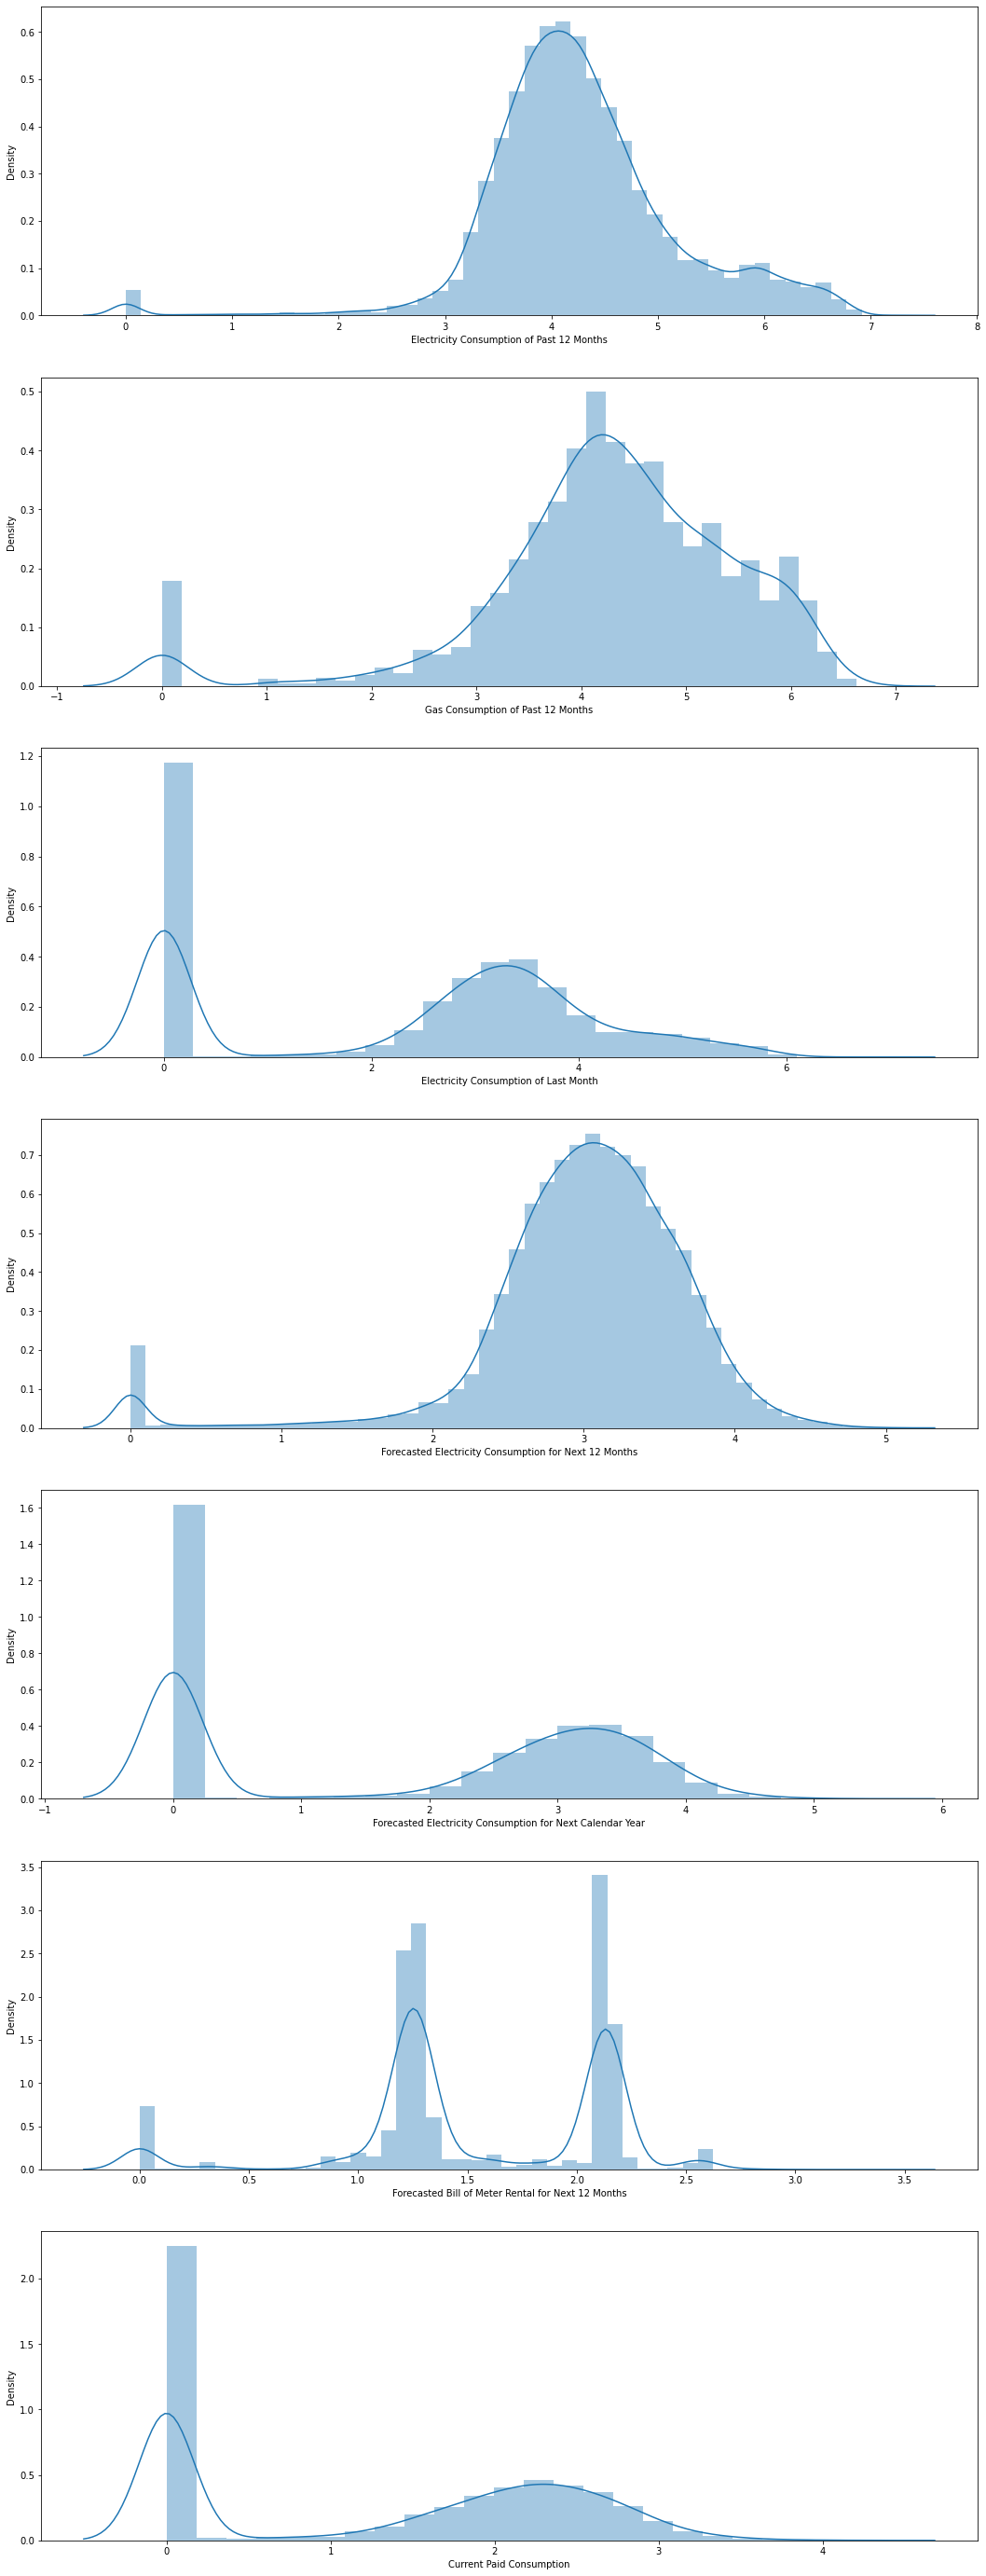

In [109]:
fig, axs = plt.subplots(nrows = 7, figsize = (18, 50))
# Plot Histograms
sns.distplot((train["Electricity Consumption of Past 12 Months"].dropna()), ax = axs[0])
sns.distplot((train[train["Client has Gas"] == 1]["Gas Consumption of Past 12 Months"].dropna()), ax = axs[1])
sns.distplot((train["Electricity Consumption of Last Month"].dropna()), ax = axs[2])
sns.distplot((train["Forecasted Electricity Consumption for Next 12 Months"].dropna()), ax = axs[3])
sns.distplot((train["Forecasted Electricity Consumption for Next Calendar Year"].dropna()), ax = axs[4])
sns.distplot((train["Forecasted Bill of Meter Rental for Next 12 Months"].dropna()), ax = axs[5])
sns.distplot((train["Current Paid Consumption"].dropna()), ax = axs[6])
plt.show()

### Boxplots

D:\New folder\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\anaconda\lib\site-packa

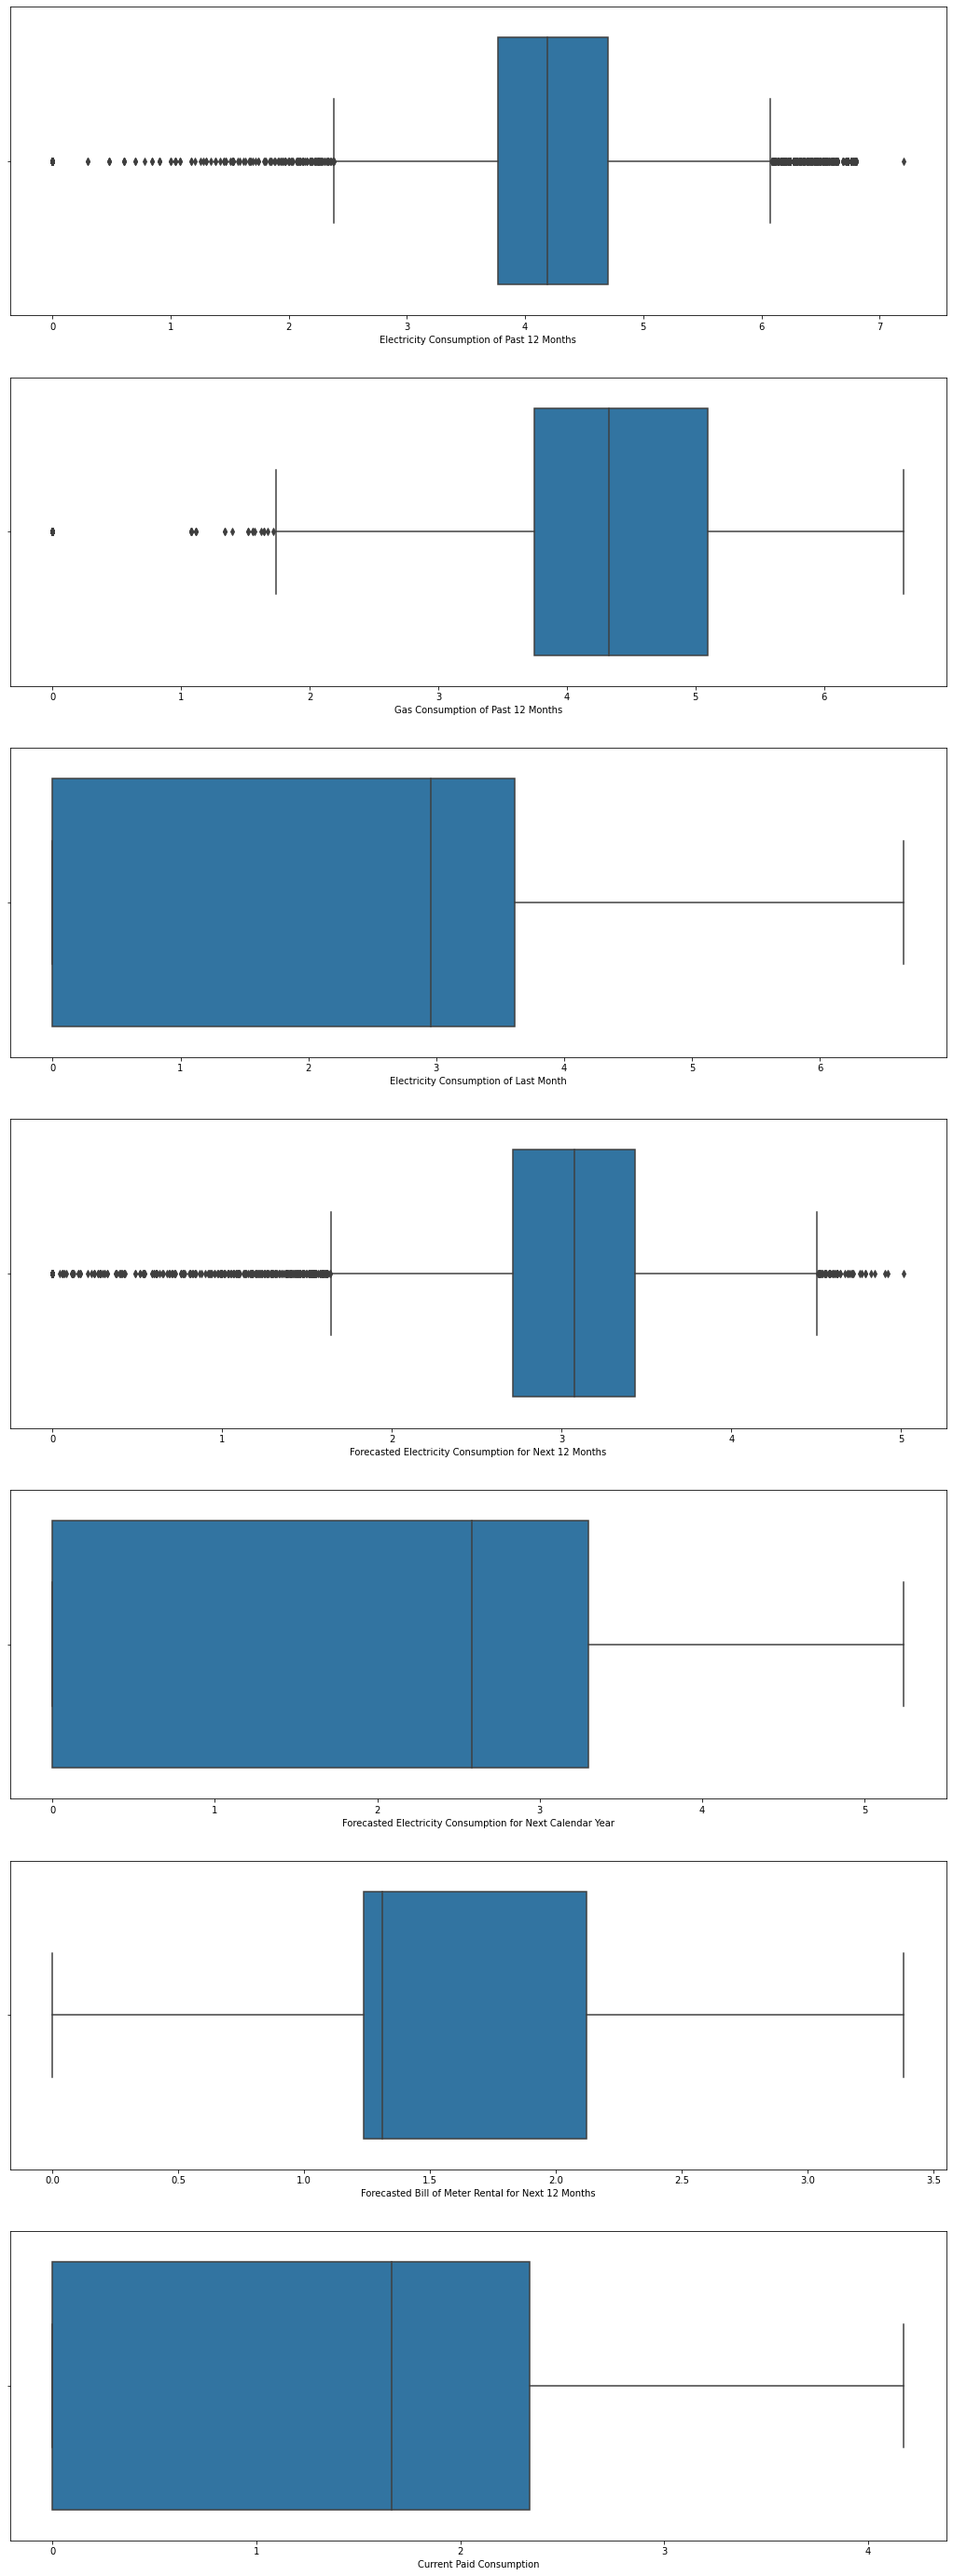

In [110]:
fig, axs = plt.subplots(nrows = 7, figsize = (18, 50))
sns.boxplot((train["Electricity Consumption of Past 12 Months"].dropna()), ax = axs[0])
sns.boxplot((train[train["Client has Gas"] == 1]["Gas Consumption of Past 12 Months"].dropna()), ax = axs[1])
sns.boxplot((train["Electricity Consumption of Last Month"].dropna()), ax = axs[2])
sns.boxplot((train["Forecasted Electricity Consumption for Next 12 Months"].dropna()), ax = axs[3])
sns.boxplot((train["Forecasted Electricity Consumption for Next Calendar Year"].dropna()), ax = axs[4])
sns.boxplot((train["Forecasted Bill of Meter Rental for Next 12 Months"].dropna()), ax = axs[5])
sns.boxplot((train["Current Paid Consumption"].dropna()), ax = axs[6])
plt.show()

In [111]:
train.describe()

,Electricity Consumption of Past 12 Months,Gas Consumption of Past 12 Months,Electricity Consumption of Last Month,Forecasted Electricity Consumption for Next 12 Months,Forecasted Electricity Consumption for Next Calendar Year,Forecasted Value of Current Discount,Forecasted Bill of Meter Rental for Next 12 Months,Forecasted Energy Price for 1st Period,Forecasted Energy Price for 2nd Period,Forecasted Power Price for 1st Period,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,16069.000000,16090.000000,16050.000000,16055.000000,16071.000000,15970.000000,16092.000000,15970.000000,15970.000000,15970.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.283812,0.800300,2.359281,3.006826,1.869956,0.991547,1.549610,0.135901,0.052951,43.533496,...,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,0.915265,1.748833,1.789067,0.709778,1.612963,5.160969,0.589394,0.026252,0.048617,5.212252,...,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.773786,0.000000,0.000000,2.713952,0.000000,0.000000,1.236285,0.115237,0.000000,40.606701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.187408,0.000000,2.959041,3.073579,2.583199,0.000000,1.310481,0.142881,0.086163,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.701508,0.000000,3.617000,3.430950,3.301030,0.000000,2.122126,0.146348,0.098837,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.206748,6.622052,6.656933,5.016210,5.243970,50.000000,3.382502,0.273963,0.195975,59.444710,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The distributions look much closer to normal distributions now!

Notice how the standard deviation std has changed.

From the boxplots we can still see some values are quite far from the range ( outliers ). We will deal with them later.

### High correlation variables

Calculate the correlation of the variables

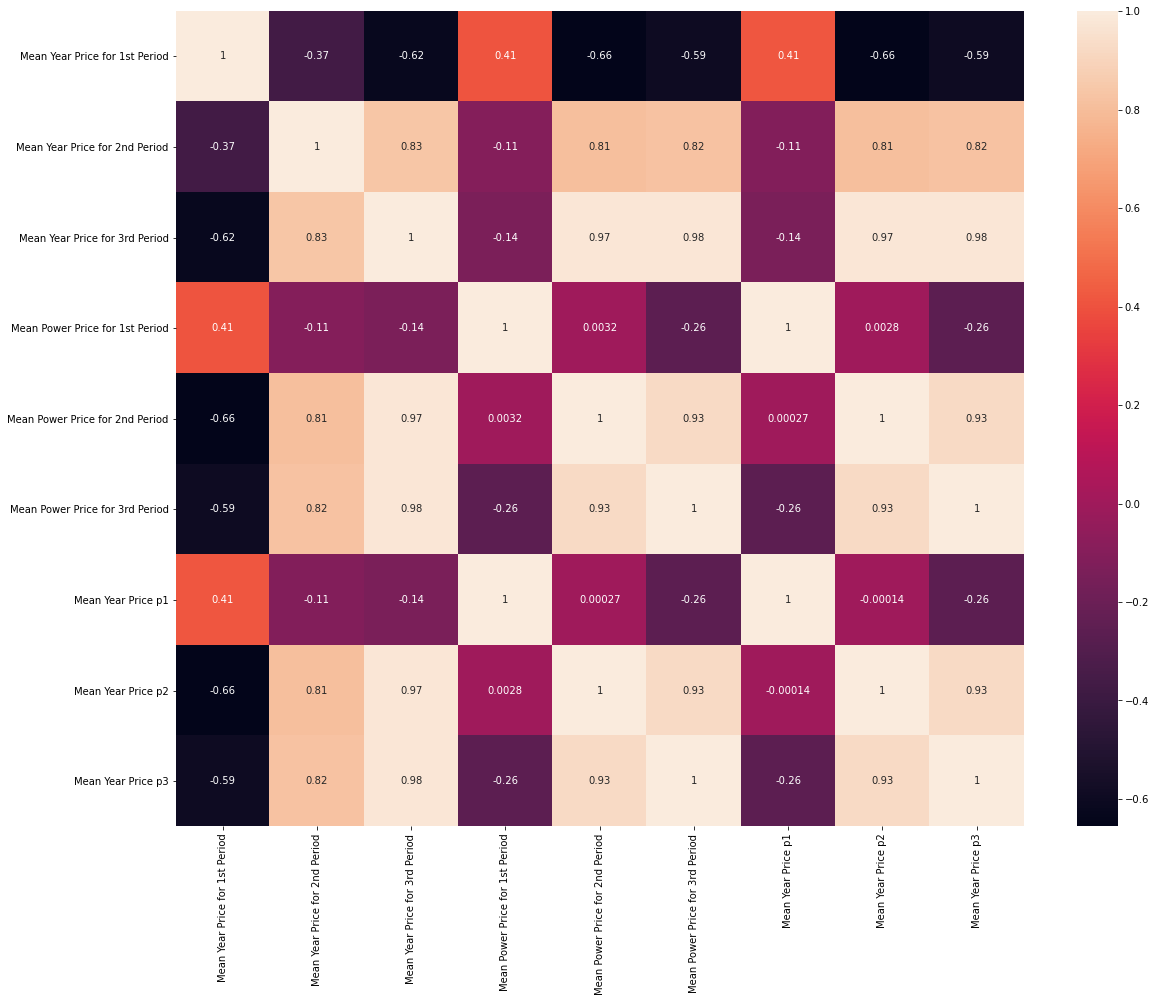

In [112]:
correlation = features.corr()
plt.figure(figsize = (19, 15))
sns.heatmap(correlation, 
            xticklabels = correlation.columns.values,
            yticklabels = correlation.columns.values,
            annot = True,
            annot_kws = {"size": 10})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

We can remove highly correlated variables.

Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and should be fixed before training the model.

In [113]:
correlation = train.corr()

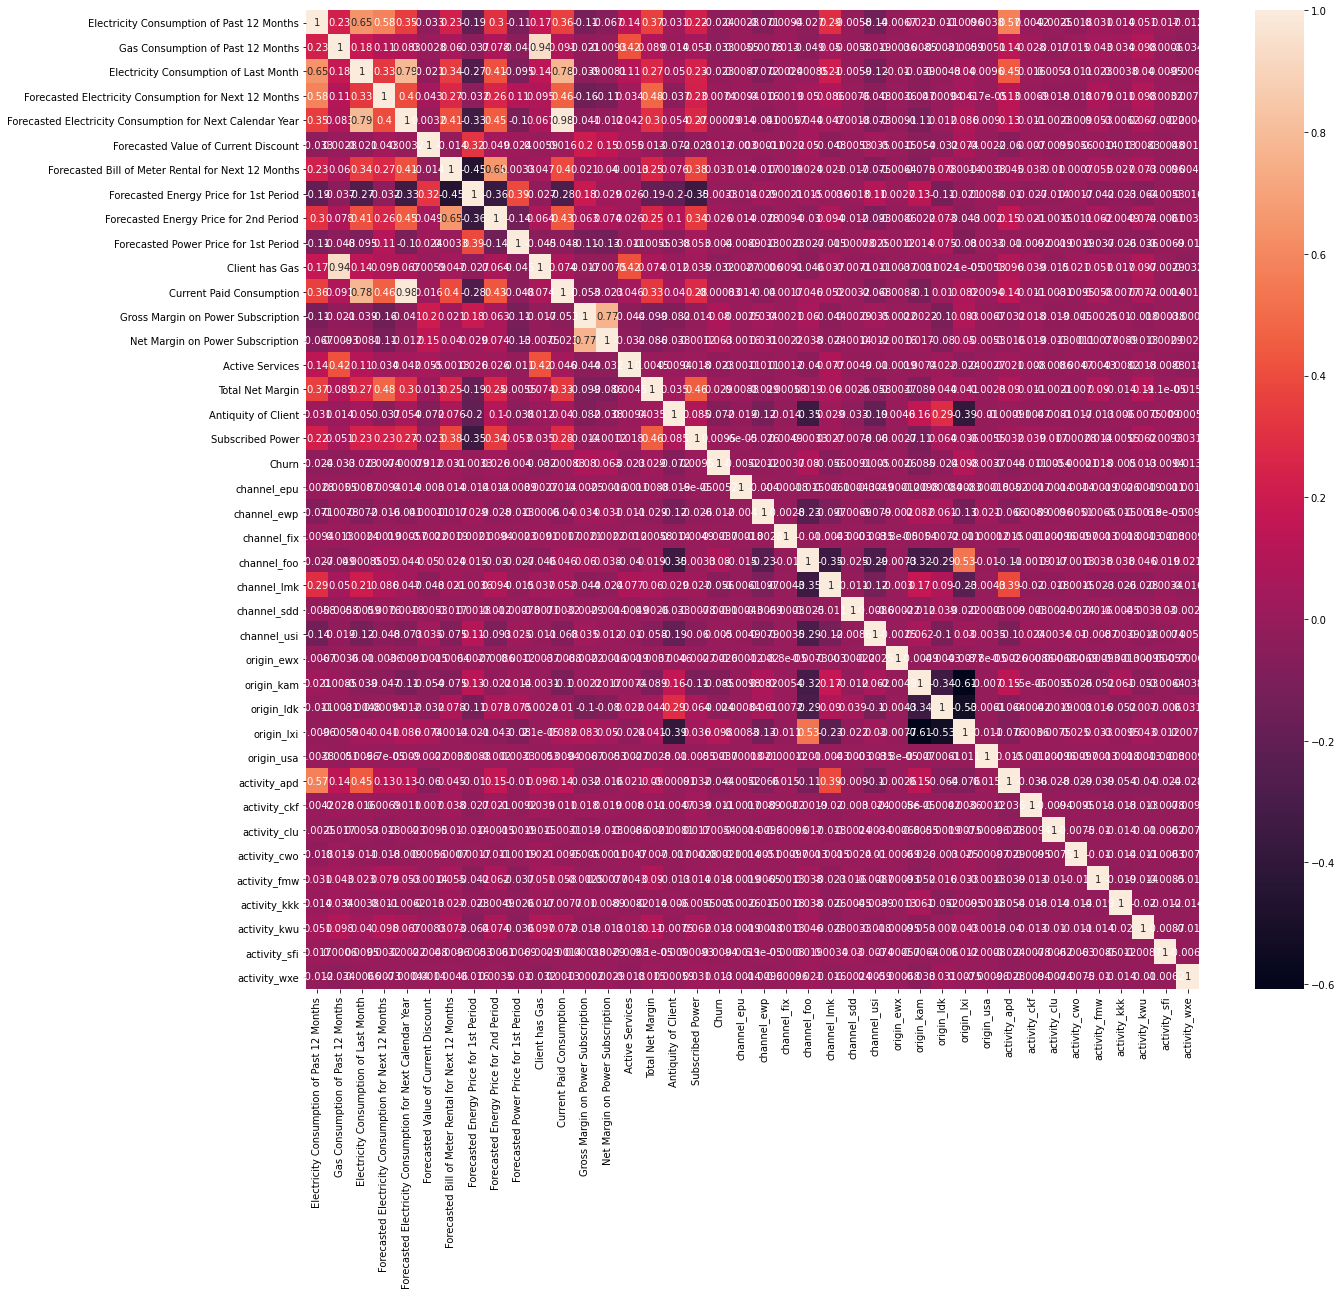

In [114]:
plt.figure(figsize = (20, 18))
sns.heatmap(correlation, 
            xticklabels = correlation.columns.values,
            yticklabels = correlation.columns.values, annot = True, annot_kws = {"size": 10})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

As expected, num_years_antig has a high correlation with months_activ (it provides us the same information).

We can remove variables with very high correlation.

In [115]:
train.drop(columns = ["Antiquity of Client", "Forecasted Electricity Consumption for Next Calendar Year"], inplace = True)

### Removing Outliers

As we identified during the exploratory phase, the consumption data has several outliers. We are going to remove those outliers

**What are the criteria to identify an outlier?**

1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile

2. Data point that falls outside of 3 standard deviations.

There are several ways to handle with those outliers such as removing them (this works well for massive datasets) or replacing them with sensible data (works better when the dataset is not that big).

In [116]:
def replace_outliers_z_score(dataframe, column, Z=3):
    
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column 

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore

    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

    # Replace with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [117]:
#for c in features.columns:
    #if c != "id":
        #features = replace_outliers_z_score(features,c)

In [118]:
 features.reset_index(drop=True, inplace=True)

D:\New folder\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\anaconda\lib\site-packa

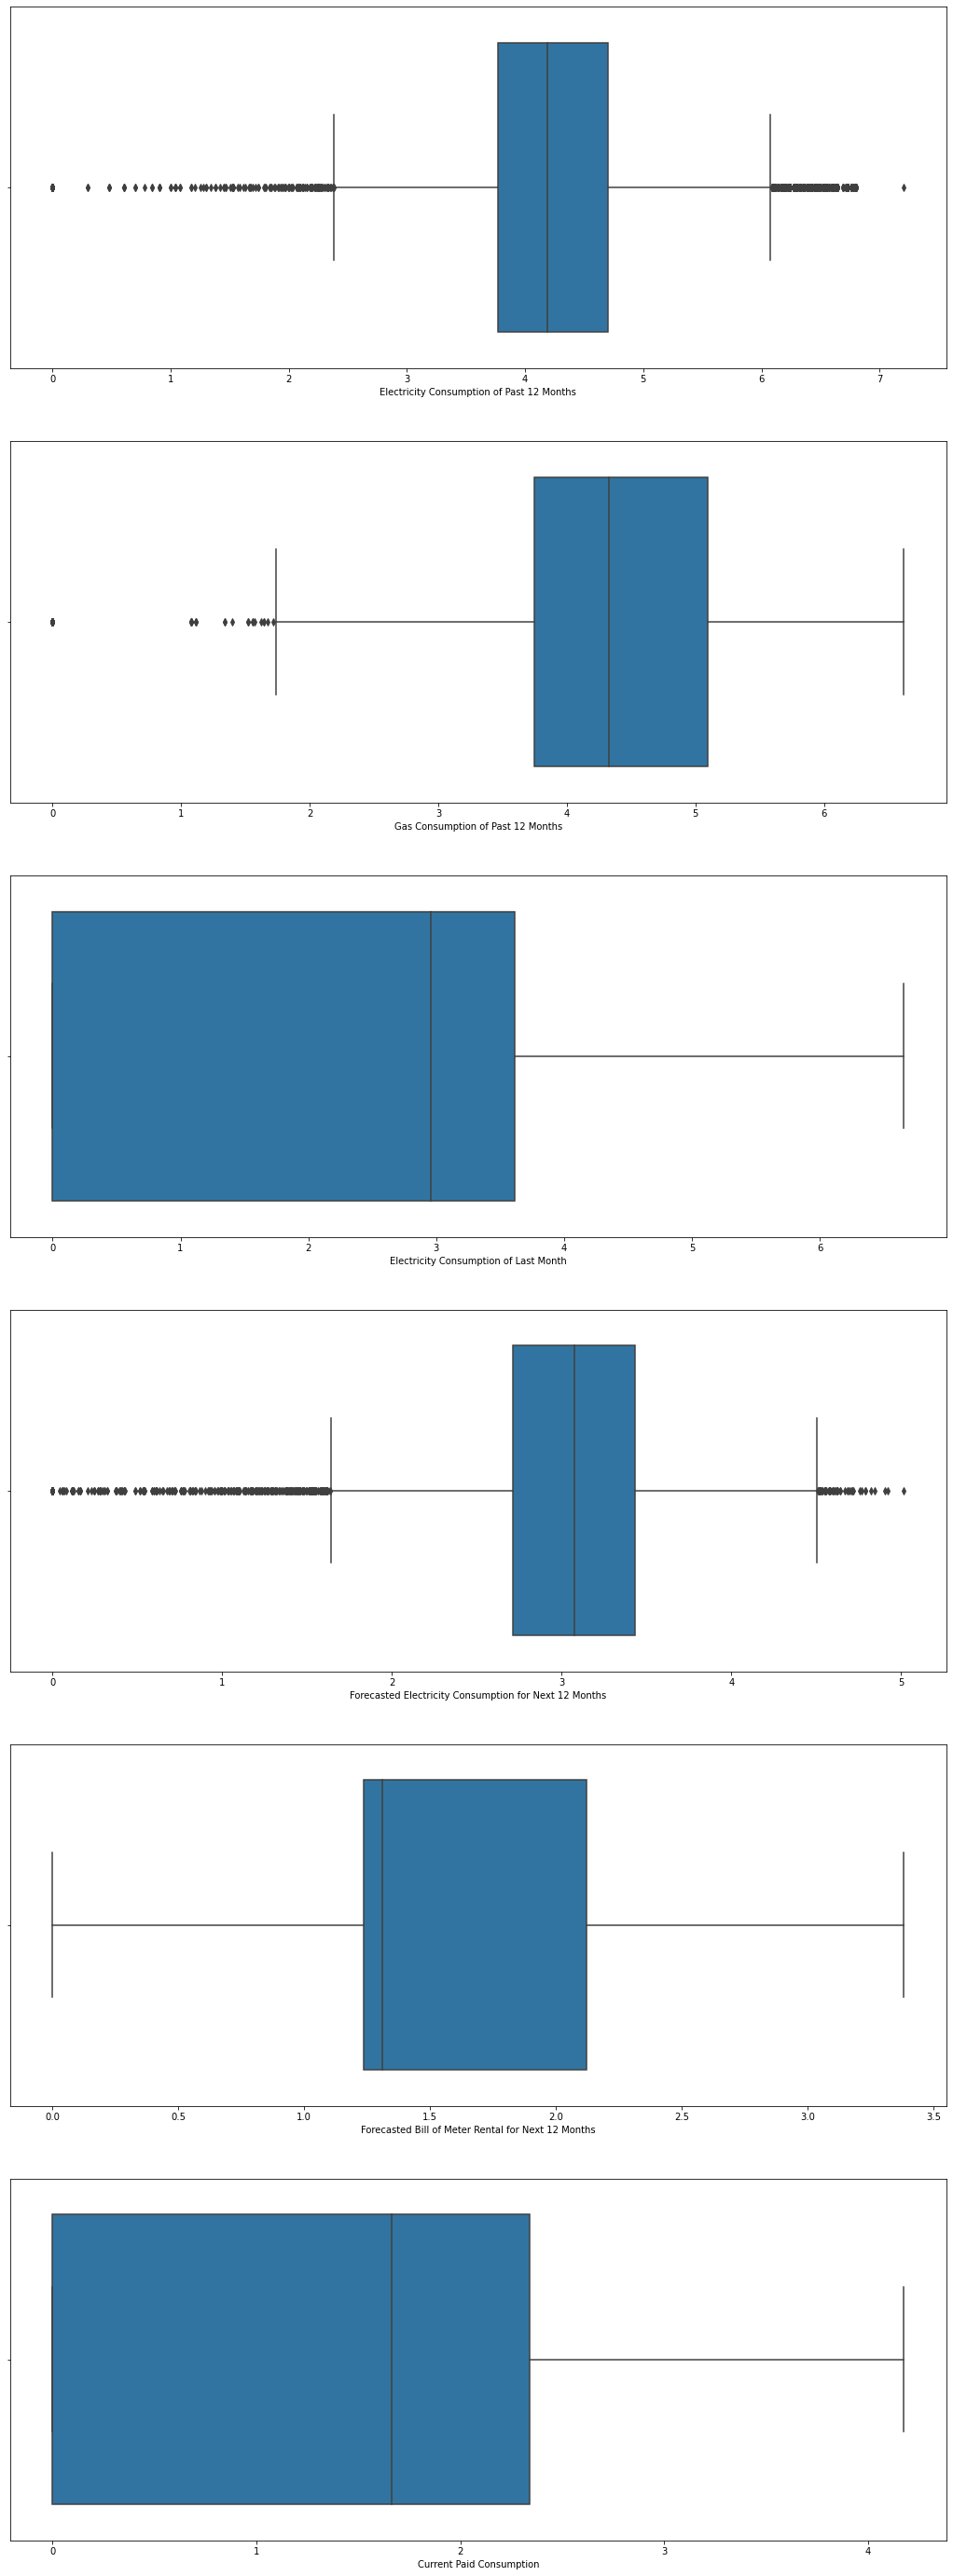

In [119]:
fig, axs = plt.subplots(nrows = 6, figsize = (18, 50))
sns.boxplot((train["Electricity Consumption of Past 12 Months"].dropna()), ax = axs[0])
sns.boxplot((train[train["Client has Gas"] == 1]["Gas Consumption of Past 12 Months"].dropna()), ax = axs[1])
sns.boxplot((train["Electricity Consumption of Last Month"].dropna()), ax = axs[2])
sns.boxplot((train["Forecasted Electricity Consumption for Next 12 Months"].dropna()), ax = axs[3])
sns.boxplot((train["Forecasted Bill of Meter Rental for Next 12 Months"].dropna()), ax = axs[4])
sns.boxplot((train["Current Paid Consumption"].dropna()), ax = axs[5])
plt.show()

### Pickling

In [120]:
PICKLE_TRAIN_DIR = os.path.join("F:\Python Practice", "processing_data", "df_train.pkl")
PICKLE_HISTORY_DIR = os.path.join("F:\Python Practice", "processing_data", "df_training_data_history.pkl")

In [121]:
pd.to_pickle(train, PICKLE_TRAIN_DIR)
pd.to_pickle(history_data, PICKLE_HISTORY_DIR)